In [1]:
# -*- coding: utf-8 -*-
# @author: @楨
# @description: halftone image homework

In [2]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def create_bayer_matrix(n, x=np.array([[0, 2], [3, 1]]), transpose=False):
    if n == 2:
        return x
    
    else:
        if transpose == False:
            consts = np.array([0, 2, 3, 1])
            a, b, c, d = (x * 4 + const for const in consts)
            transpose = True
            
        else:
            consts = np.array([0, 3, 2, 1])
            a, b, c, d = ((x * 4).T + const for const in consts)
            transpose = False

        up = np.concatenate((a, b), axis=1)
        dn = np.concatenate((c, d), axis=1)
        y = np.concatenate((up, dn), axis=0)
        
        return create_bayer_matrix(n / 2, y, transpose)
        

In [4]:
m2 = create_bayer_matrix(2)
print('2x2 bayer_matrix:\n', m2)

m4 = create_bayer_matrix(4)
print('\n4x4 bayer_matrix:\n', m4)

m8 = create_bayer_matrix(8)
print('\n8x8 bayer_matrix:\n', m8)

m16 = create_bayer_matrix(16)
print('\n16x16 bayer_matrix:\n',m16)

2x2 bayer_matrix:
 [[0 2]
 [3 1]]

4x4 bayer_matrix:
 [[ 0  8  2 10]
 [12  4 14  6]
 [ 3 11  1  9]
 [15  7 13  5]]

8x8 bayer_matrix:
 [[ 0 48 12 60  3 51 15 63]
 [32 16 44 28 35 19 47 31]
 [ 8 56  4 52 11 59  7 55]
 [40 24 36 20 43 27 39 23]
 [ 2 50 14 62  1 49 13 61]
 [34 18 46 30 33 17 45 29]
 [10 58  6 54  9 57  5 53]
 [42 26 38 22 41 25 37 21]]

16x16 bayer_matrix:
 [[  0 192  48 240  12 204  60 252   2 194  50 242  14 206  62 254]
 [128  64 176 112 140  76 188 124 130  66 178 114 142  78 190 126]
 [ 32 224  16 208  44 236  28 220  34 226  18 210  46 238  30 222]
 [160  96 144  80 172 108 156  92 162  98 146  82 174 110 158  94]
 [  8 200  56 248   4 196  52 244  10 202  58 250   6 198  54 246]
 [136  72 184 120 132  68 180 116 138  74 186 122 134  70 182 118]
 [ 40 232  24 216  36 228  20 212  42 234  26 218  38 230  22 214]
 [168 104 152  88 164 100 148  84 170 106 154  90 166 102 150  86]
 [  3 195  51 243  15 207  63 255   1 193  49 241  13 205  61 253]
 [131  67 179 115 143  

In [5]:
def ordered_dithering(img, dither_matrix_size):
    n = dither_matrix_size
    r = 256 / (n*n)

    bayer_matrix = create_bayer_matrix(n)
    dither_matrix = r * bayer_matrix

    (w, h, c) = img.shape
    
    img2 = np.zeros(img.shape,dtype='uint8')
    
    for x in range(w):
        for y in range(h):
            for k in range(c):
                if img[x][y][k] > dither_matrix[x % n][y % n]:
                    img2[x][y][k]=255
                else:
                    img2[x][y][k]=0

    return img2

origin image


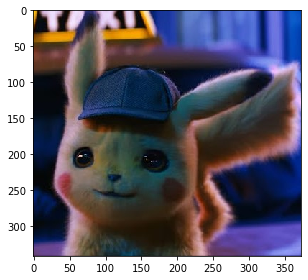

In [6]:
img = io.imread('pikachu2.jpg') 

print('origin image')

io.imshow(img)

dither_matrix 2x2


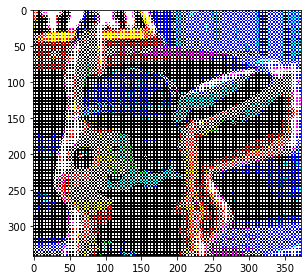

In [7]:
dither_matrix_size = 2

print('dither_matrix {}x{}'.format(dither_matrix_size, dither_matrix_size)) 

img2 = ordered_dithering(img, dither_matrix_size)

io.imshow(img2)

dither_matrix 4x4


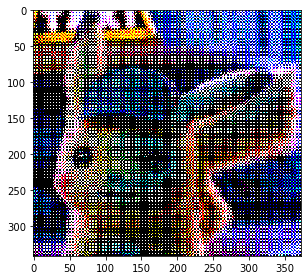

In [8]:
dither_matrix_size = 4

print('dither_matrix {}x{}'.format(dither_matrix_size, dither_matrix_size)) 

img2 = ordered_dithering(img, dither_matrix_size)

io.imshow(img2)

dither_matrix 8x8


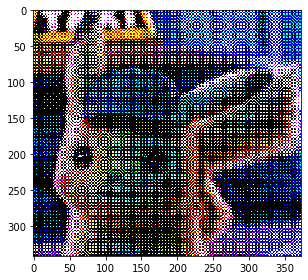

In [9]:
dither_matrix_size = 8

print('dither_matrix {}x{}'.format(dither_matrix_size, dither_matrix_size)) 

img2 = ordered_dithering(img, dither_matrix_size)

io.imshow(img2)

dither_matrix 16x16


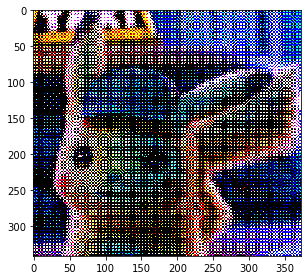

In [10]:
dither_matrix_size = 16

print('dither_matrix {}x{}'.format(dither_matrix_size, dither_matrix_size)) 

img2 = ordered_dithering(img, dither_matrix_size)

io.imshow(img2)

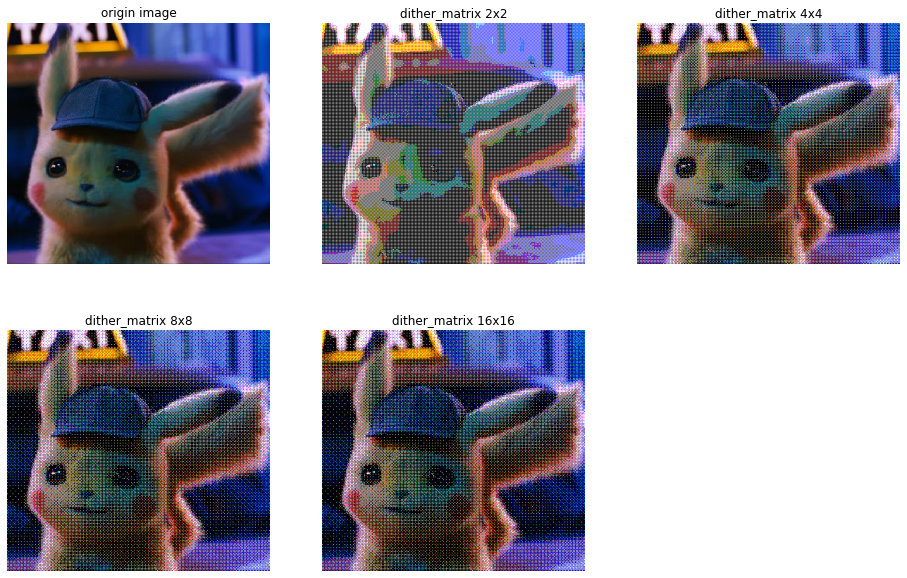

In [11]:
img = io.imread('pikachu2.jpg')

plt.figure(num='pikachu2',figsize=(16,16)) 

plt.subplot(3,3,1) 
plt.title('origin image')           
plt.imshow(img)
plt.axis('off')  

for idx,i in enumerate([2,4,8,16]):
    plt.subplot(3,3,idx+2)                  
    plt.title('dither_matrix {}x{}'.format(i,i))           
    img2 = ordered_dithering(img, dither_matrix_size=i)
    plt.imshow(img2)
    plt.axis('off')  


plt.show()

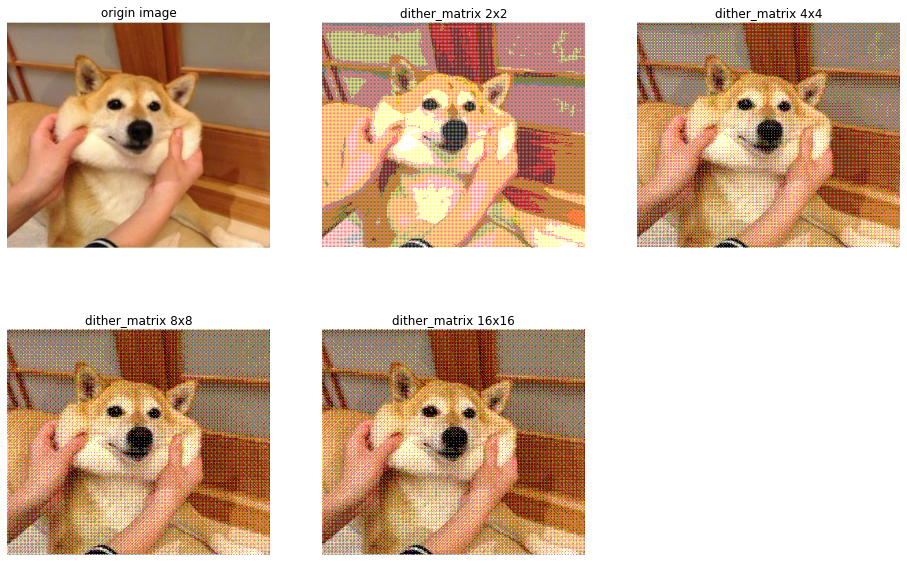

In [12]:
img = io.imread('dog.jpg')

plt.figure(num='dog',figsize=(16,16)) 

plt.subplot(3,3,1) 
plt.title('origin image')           
plt.imshow(img)
plt.axis('off')  

for idx,i in enumerate([2,4,8,16]):
    plt.subplot(3,3,idx+2)                  
    plt.title('dither_matrix {}x{}'.format(i,i))           
    img2 = ordered_dithering(img, dither_matrix_size=i)
    plt.imshow(img2)
    plt.axis('off')  


plt.show()